In [25]:
from openseespy.opensees import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wipe() 
model('basic', '-ndm', 2, '-ndf', 2)

In [27]:
# variables
A = 4.0
E = 29000.0
alpha = 0.05
sY = 36.0
udisp = 2.5
Nsteps = 1000
Px = 160.0
Py = 0.0

In [28]:
# create nodes
node(1, 0.0, 0.0)
node(2, 72.0, 0.0)
node(3, 168.0, 0.0)
node(4, 48.0, 144.0)

In [29]:
# set boundary condition
fix(1, 1, 1)
fix(2, 1, 1)
fix(3, 1, 1)

In [30]:
# define materials => uniaxialMaterial('Hardening', matTag, E, sigmaY, H_iso, H_kin, eta=0.0)
uniaxialMaterial("Hardening", 1, E, sY, 0.0, alpha/(1-alpha)*E)

In [31]:
# define elements
element("Truss",1,1,4,A,1)
element("Truss",2,2,4,A,1)
element("Truss",3,3,4,A,1)

In [32]:
# create TimeSeries
timeSeries("Linear", 1)
# create a plain load pattern
pattern("Plain", 1, 1)
# Create the nodal load
load(4, Px, Py)

In [33]:
# create SOE
system("ProfileSPD")
# create DOF number
numberer("Plain")
# create constraint handler
constraints("Plain")
# create integrator
integrator("LoadControl", 1.0/Nsteps)
# create algorithm
algorithm("Newton")
# create test
test('NormUnbalance',1e-8, 10)
# create analysis object
analysis("Static")

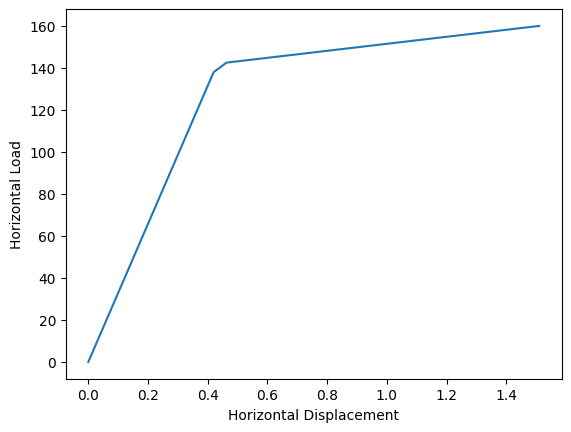

In [34]:
# perform the analysis
data = np.zeros((Nsteps+1,2))
for j in range(Nsteps):
    analyze(1)
    data[j+1,0] = nodeDisp(4,1)
    data[j+1,1] = getLoadFactor(1)*Px

plt.plot(data[:,0], data[:,1])
plt.xlabel('Horizontal Displacement')
plt.ylabel('Horizontal Load')
plt.show()

In [35]:
data

array([[0.00000000e+00, 0.00000000e+00],
       [4.86696553e-04, 1.60000000e-01],
       [9.73393107e-04, 3.20000000e-01],
       ...,
       [1.49124951e+00, 1.59680000e+02],
       [1.50084016e+00, 1.59840000e+02],
       [1.51043081e+00, 1.60000000e+02]])